In [1]:
INPUT_FOLDER = '/Users/bober/Desktop/study/naukma/prog/data'

INPUT_FILE_MERGED = 'merged_dataset_v1.csv'
INPUT_FILE_ISW = 'isw_all_days_parsed_v1.csv'
INPUT_FOLDER = '/Users/bober/Desktop/study/naukma/prog/data'

MODEL_FOLDER = "models"


tfidf_transformer_model = "tfidf_transformer"
count_vectorizer_model = "count_vectorizer"

tfidf_transformer_version = "v1"
count_vectorizer_version = "v1"

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

In [3]:
import pandas as pd
import datetime
import pickle
import scipy
import numpy as np

In [4]:
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from collections import Counter
from num2words import num2words
from nltk.corpus import stopwords
import nltk

In [5]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [6]:
df_raw_data = pd.read_csv(f'{INPUT_FOLDER}/{INPUT_FILE_MERGED}',sep = ';')

In [7]:
df_raw_data

,city_resolvedAddress,day_datetime,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,day_solarradiation,...,event_end_date,event_intersection_alarm_region_counts,event_amount_of_alarms_for_one_day,event_start_hour,event_end_hour,event_last_24_hour_in_region,event_start_hour_datetimeEpoch,event_end_hour_datetimeEpoch,event_hour_level_event_time,event_hour_level_event_datetimeEpoch
0,"Херсон, Україна",2022-02-25,6.4,0.7,3.7,0.2,78.0,0.000,0.00,99.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Херсон, Україна",2022-02-25,6.4,0.7,3.7,0.2,78.0,0.000,0.00,99.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Херсон, Україна",2022-02-25,6.4,0.7,3.7,0.2,78.0,0.000,0.00,99.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Херсон, Україна",2022-02-25,6.4,0.7,3.7,0.2,78.0,0.000,0.00,99.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Херсон, Україна",2022-02-25,6.4,0.7,3.7,0.2,78.0,0.000,0.00,99.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194527,"Луцьк, Луцький район, Україна",2023-01-20,3.7,0.3,1.5,0.4,92.5,0.704,4.17,19.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194528,"Луцьк, Луцький район, Україна",2023-01-20,3.7,0.3,1.5,0.4,92.5,0.704,4.17,19.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194529,"Луцьк, Луцький район, Україна",2023-01-20,3.7,0.3,1.5,0.4,92.5,0.704,4.17,19.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194530,"Луцьк, Луцький район, Україна",2023-01-20,3.7,0.3,1.5,0.4,92.5,0.704,4.17,19.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#df_raw_data[df_raw_data['day_datetime']=='2022-04-28']

In [9]:
is_alarm = ~((df_raw_data['event_end_hour'].isna()) & (df_raw_data['event_start_hour'].isna()))

In [10]:
df_raw_data['is_alarm']= is_alarm
df_raw_data

,city_resolvedAddress,day_datetime,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,day_solarradiation,...,event_intersection_alarm_region_counts,event_amount_of_alarms_for_one_day,event_start_hour,event_end_hour,event_last_24_hour_in_region,event_start_hour_datetimeEpoch,event_end_hour_datetimeEpoch,event_hour_level_event_time,event_hour_level_event_datetimeEpoch,is_alarm
0,"Херсон, Україна",2022-02-25,6.4,0.7,3.7,0.2,78.0,0.000,0.00,99.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,"Херсон, Україна",2022-02-25,6.4,0.7,3.7,0.2,78.0,0.000,0.00,99.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,"Херсон, Україна",2022-02-25,6.4,0.7,3.7,0.2,78.0,0.000,0.00,99.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,"Херсон, Україна",2022-02-25,6.4,0.7,3.7,0.2,78.0,0.000,0.00,99.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,"Херсон, Україна",2022-02-25,6.4,0.7,3.7,0.2,78.0,0.000,0.00,99.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194527,"Луцьк, Луцький район, Україна",2023-01-20,3.7,0.3,1.5,0.4,92.5,0.704,4.17,19.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
194528,"Луцьк, Луцький район, Україна",2023-01-20,3.7,0.3,1.5,0.4,92.5,0.704,4.17,19.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
194529,"Луцьк, Луцький район, Україна",2023-01-20,3.7,0.3,1.5,0.4,92.5,0.704,4.17,19.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
194530,"Луцьк, Луцький район, Україна",2023-01-20,3.7,0.3,1.5,0.4,92.5,0.704,4.17,19.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [11]:
df_raw_data.describe()


,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,day_solarradiation,day_solarenergy,day_uvindex,...,event_region_id,event_all_region,event_intersection_alarm_id,event_duration_in_mins_int,event_intersection_alarm_region_counts,event_amount_of_alarms_for_one_day,event_last_24_hour_in_region,event_start_hour_datetimeEpoch,event_end_hour_datetimeEpoch,event_hour_level_event_datetimeEpoch
count,194532.000000,194532.000000,194532.000000,194532.000000,194532.000000,194532.000000,194532.000000,194532.000000,194532.000000,194532.000000,...,49249.000000,49249.000000,4924.000000,49249.000000,49249.000000,49249.000000,49249.000000,4.924900e+04,4.924900e+04,4.924900e+04
mean,15.298069,6.714788,10.961227,5.256789,71.500915,2.501287,7.093413,154.529203,13.310194,5.317917,...,12.518508,0.755569,14621.973193,78.500416,12.075859,85.680562,6.331682,1.657251e+09,1.657259e+09,1.657255e+09
std,9.911493,7.898592,8.762649,7.516936,15.056165,15.227688,12.344893,100.067642,8.663774,2.781952,...,6.290175,0.429754,13597.299433,84.982098,7.650067,46.838996,6.037332,8.264011e+06,8.263888e+06,8.263950e+06
min,-11.700000,-50.300000,-17.200000,-20.600000,23.300000,0.000000,0.000000,1.100000,0.000000,0.000000,...,1.000000,0.000000,45.000000,0.000000,1.000000,1.000000,1.000000,1.645826e+09,1.645834e+09,1.645826e+09
25%,7.200000,0.300000,3.800000,-0.200000,59.900000,0.000000,0.000000,60.400000,5.100000,3.000000,...,8.000000,1.000000,3382.000000,29.000000,5.000000,50.000000,3.000000,1.649290e+09,1.649293e+09,1.649293e+09
50%,15.800000,6.700000,11.000000,5.800000,72.200000,0.074000,4.170000,150.000000,12.900000,6.000000,...,13.000000,1.000000,8376.000000,50.000000,10.000000,72.000000,5.000000,1.656072e+09,1.656079e+09,1.656072e+09
75%,23.200000,13.000000,18.200000,11.100000,84.400000,1.100000,8.330000,235.400000,20.300000,8.000000,...,18.000000,1.000000,23266.000000,96.000000,21.000000,113.000000,7.000000,1.664507e+09,1.664510e+09,1.664510e+09
max,37.000000,24.200000,30.100000,21.100000,100.000000,306.000000,83.330000,359.500000,30.900000,10.000000,...,24.000000,1.000000,47488.000000,1123.000000,23.000000,198.000000,44.000000,1.674230e+09,1.674234e+09,1.674234e+09


In [12]:
df_isw_raw = pd.read_csv(f'{INPUT_FOLDER}/{INPUT_FILE_ISW}',sep = ';')
df_isw_raw

,date,short_url,title,text_title,full_url,main_html,main_html_v2,main_html_v7,report_text_lemm,report_text_stemm,keywords
0,2022-02-24,russia_ukraine_warning_update_initial_russian_...,Russia-Ukraine Warning Update: Initial Russian...,Russia-Ukraine Warning Update: Initial Russian...,/backgrounder/russia-ukraine-warning-update-in...,"<div class=""field field-name-body field-type-t...","\nMason Clark, George Barros, and Kateryna S...",\nRussian President Vladimir Putin began a lar...,russian presid vladimir putin began larg scal...,russian presid vladimir putin began larg scal...,"{'pm': 0.388, 'airport': 0.262, 'kyiv': 0.244,..."
1,2022-02-25,russia_ukraine_warning_update_russian_offensiv...,Russia-Ukraine Warning Update: Russian Offensi...,Russia-Ukraine Warning Update: Russian Offensi...,/backgrounder/russia-ukraine-warning-update-ru...,"<div class=""field field-name-body field-type-t...","Mason Clark, George Barros, and Kateryna Step...",\nRussian forces entered the outskirts of Kyiv...,russian forc enter outskirt kyiv west bank dn...,russian forc enter outskirt kyiv west bank dn...,"{'pm': 0.36, 'zero': 0.351, 'februari': 0.336,..."
2,2022-02-27,russia_ukraine_warning_update_russian_offensiv...,Russia-Ukraine Warning Update: Russian Offensi...,Russia-Ukraine Warning Update: Russian Offensi...,/backgrounder/russia-ukraine-warning-update-ru...,"<div class=""field field-name-body field-type-t...","\nMason Clark, George Barros, and Kateryna St...",\nThe Russian military has likely recognized t...,russian militari like recogn initi expect lim...,russian militari like recogn initi expect lim...,"{'februari': 0.553, 'kyiv': 0.262, 'seven': 0...."
3,2022-02-28,russian_offensive_campaign_assessment_february...,"Russian Offensive Campaign Assessment, Februar...","Russian Offensive Campaign Assessment, Februar...",/backgrounder/russian-offensive-campaign-asses...,"<div class=""field field-name-body field-type-t...","\nMason Clark, George Barros, and Kateryna S...",\nThe Russian military is reorganizing its mil...,russian militari reorgan militari effort atte...,russian militari reorgan militari effort atte...,"{'februari': 0.593, 'eight': 0.267, 'kyiv': 0...."
4,2022-03-01,russian_offensive_campaign_assessment_march_1,"Russian Offensive Campaign Assessment, March 1...","Russian Offensive Campaign Assessment, March 1",/backgrounder/russian-offensive-campaign-asses...,"<div class=""field field-name-body field-type-t...","\nFrederick W. Kagan, George Barros, and Kat...",\nRussian forces are completing the reinforcem...,russian forc complet reinforc resuppli troop ...,russian forc complet reinforc resuppli troop ...,"{'kyiv': 0.357, 'envelop': 0.287, 'chernihiv':..."
...,...,...,...,...,...,...,...,...,...,...,...
329,2023-01-21,russian_offensive_campaign_assessment_january_...,"Russian Offensive Campaign Assessment, January...","Russian Offensive Campaign Assessment, January...",/backgrounder/russian-offensive-campaign-asses...,"<div class=""field field-name-body field-type-t...","\nKarolina Hird, Grace Mappes, Angela Howard...",\nThe Ukrainian defense of Bakhmut is likely a...,ukrainian defens bakhmut like strateg sound e...,ukrainian defen bakhmut like strateg sound ef...,"{'januari': 0.491, 'teplinski': 0.219, 'milblo..."
330,2023-01-22,russian_offensive_campaign_assessment_january_...,"Russian Offensive Campaign Assessment, Januar...","Russian Offensive Campaign Assessment, Januar...",/backgrounder/russian-offensive-campaign-asses...,"<div class=""field field-name-body field-type-t...","\nRussian Offensive Campaign Assessment, Janu...",\nISW is publishing an abbreviated campaign up...,isw publish abbrevi campaign updat today janu...,isw publish abbrevi campaign updat today janu...,"{'prigozhin': 0.6, 'putin': 0.328, 'wagner': 0..."
331,2023-01-23,russian_offensive_campaign_assessment_january_...,"Russian Offensive Campaign Assessment, January...","Russian Offensive Campaign Assessment, January...",/backgrounder/russian-offensive-cam

### dropping the row and selecting the necessary columns/


In [13]:
#pd.to_datetime(df_isw_raw['date'])+datetime.timedelta(days=1)
df_isw_raw['report_date']=df_isw_raw['date']
df_isw_raw['date_tmrw']= (pd.to_datetime(df_isw_raw['date'])+datetime.timedelta(days=1)).dt.strftime('%Y-%m-%d')


In [14]:
df_isw_upd = df_isw_raw.drop( labels = 0, axis=0,inplace=False)[["report_date", "date_tmrw", "keywords", "main_html_v7", "report_text_lemm"]].copy().add_prefix('isw_')


In [15]:
df_isw_upd

,isw_report_date,isw_date_tmrw,isw_keywords,isw_main_html_v7,isw_report_text_lemm
1,2022-02-25,2022-02-26,"{'pm': 0.36, 'zero': 0.351, 'februari': 0.336,...",\nRussian forces entered the outskirts of Kyiv...,russian forc enter outskirt kyiv west bank dn...
2,2022-02-27,2022-02-28,"{'februari': 0.553, 'kyiv': 0.262, 'seven': 0....",\nThe Russian military has likely recognized t...,russian militari like recogn initi expect lim...
3,2022-02-28,2022-03-01,"{'februari': 0.593, 'eight': 0.267, 'kyiv': 0....",\nThe Russian military is reorganizing its mil...,russian militari reorgan militari effort atte...
4,2022-03-01,2022-03-02,"{'kyiv': 0.357, 'envelop': 0.287, 'chernihiv':...",\nRussian forces are completing the reinforcem...,russian forc complet reinforc resuppli troop ...
5,2022-03-02,2022-03-03,"{'march': 0.546, 'kyiv': 0.382, 'envelop': 0.2...",\nRussian forces resumed offensive operations ...,russian forc resum offens oper support envelo...
...,...,...,...,...,...
329,2023-01-21,2023-01-22,"{'januari': 0.491, 'teplinski': 0.219, 'milblo...",\nThe Ukrainian defense of Bakhmut is likely a...,ukrainian defens bakhmut like strateg sound e...
330,2023-01-22,2023-01-23,"{'prigozhin': 0.6, 'putin': 0.328, 'wagner': 0...",\nISW is publishing an abbreviated campaign up...,isw publish abbrevi campaign updat today janu...
331,2023-01-23,2023-01-24,"{'januari': 0.679, 'three': 0.171, 'two': 0.13...",\nUkrainian intelligence assessed that Russian...,ukrainian intellig ass russian forc prepar of...
332,2023-01-24,2023-01-25,"{'januari': 0.516, 'claim': 0.184, 'bakhmut': ...",\nA coalition of NATO member states reportedly...,coalit nato member state reportedli send ukra...


In [16]:
df_all = df_raw_data.merge(df_isw_upd, how = 'left', left_on = 'day_datetime', right_on = 'isw_date_tmrw')

In [17]:
df_all.sample(5)

,city_resolvedAddress,day_datetime,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,day_solarradiation,...,event_start_hour_datetimeEpoch,event_end_hour_datetimeEpoch,event_hour_level_event_time,event_hour_level_event_datetimeEpoch,is_alarm,isw_report_date,isw_date_tmrw,isw_keywords,isw_main_html_v7,isw_report_text_lemm
9380,"Івано-Франківськ, Україна",2022-04-18,7.9,-1.3,3.2,-3.4,65.2,0.3,12.50,242.9,...,1.650262e+09,1.650269e+09,2022-04-18 08:00:00,1.650269e+09,True,2022-04-17,2022-04-18,"{'april': 0.443, 'factori': 0.24, 'mariupol': ...",\nRussian forces likely captured the Port of M...,russian forc like captur port mariupol april ...
105883,"Житомир, Україна",2022-05-31,19.1,11.2,15.3,11.0,76.6,11.0,8.33,115.8,...,NaN,NaN,NaN,NaN,False,2022-05-30,2022-05-31,"{'area': 0.206, 'girkin': 0.196, 'severodonets...",\nDomestic dissent within Russian military cir...,domest dissent within russian militari circl ...
116300,"Миколаїв, Україна",2022-07-26,28.5,20.5,24.8,13.8,51.7,0.0,0.00,296.3,...,NaN,NaN,NaN,NaN,False,2022-07-25,2022-07-26,"{'novoluhansk': 0.343, 'juli': 0.274, 'occupi'...",\nRussian forces made marginal territorial gai...,russian forc made margin territori gain south...
161650,"Полтава, Україна",2022-12-28,3.3,-0.6,1.7,-1.0,82.9,0.3,4.17,14.8,...,1.672218e+09,1.672222e+09,2022-12-28 10:00:00,1.672222e+09,True,2022-12-27,2022-12-28,"{'decemb': 0.331, 'lavrov': 0.253, 'milblogg':...",\n Russian Foreign Minister Sergey Lavrov stat...,russian foreign minist sergey lavrov state kr...
121727,"Ужгород, Ужгородський район, Україна",2022-03-12,5.8,-8.8,-1.6,-13.6,42.5,0.0,0.00,182.7,...,NaN,NaN,NaN,NaN,False,2022-03-11,2022-03-12,"{'march': 0.558, 'belarusian': 0.227, 'eleven'...",\nRussian ground forces attempting to encircle...,russian ground forc attempt encircl take kyiv...


In [18]:
df_all

,city_resolvedAddress,day_datetime,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,day_solarradiation,...,event_start_hour_datetimeEpoch,event_end_hour_datetimeEpoch,event_hour_level_event_time,event_hour_level_event_datetimeEpoch,is_alarm,isw_report_date,isw_date_tmrw,isw_keywords,isw_main_html_v7,isw_report_text_lemm
0,"Херсон, Україна",2022-02-25,6.4,0.7,3.7,0.2,78.0,0.000,0.00,99.5,...,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
1,"Херсон, Україна",2022-02-25,6.4,0.7,3.7,0.2,78.0,0.000,0.00,99.5,...,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
2,"Херсон, Україна",2022-02-25,6.4,0.7,3.7,0.2,78.0,0.000,0.00,99.5,...,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
3,"Херсон, Україна",2022-02-25,6.4,0.7,3.7,0.2,78.0,0.000,0.00,99.5,...,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
4,"Херсон, Україна",2022-02-25,6.4,0.7,3.7,0.2,78.0,0.000,0.00,99.5,...,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194527,"Луцьк, Луцький район, Україна",2023-01-20,3.7,0.3,1.5,0.4,92.5,0.704,4.17,19.6,...,NaN,NaN,NaN,NaN,False,2023-01-19,2023-01-20,"{'januari': 0.427, 'prigozhin': 0.213, 'belaru...",\nSenior Kremlin officials continue holding hi...,senior kremlin offici continu hold high level...
194528,"Луцьк, Луцький район, Україна",2023-01-20,3.7,0.3,1.5,0.4,92.5,0.704,4.17,19.6,...,NaN,NaN,NaN,NaN,False,2023-01-19,2023-01-20,"{'januari': 0.427, 'prigozhin': 0.213, 'belaru...",\nSenior Kremlin officials continue holding hi...,senior kremlin offici continu hold high level...
194529,"Луцьк, Луцький район, Україна",2023-01-20,3.7,0.3,1.5,0.4,92.5,0.704,4.17,19.6,...,NaN,NaN,NaN,NaN,False,2023-01-19,2023-01-20,"{'januari': 0.427, 'prigozhin': 0.213, 'belaru...",\nSenior Kremlin officials continue holding hi...,senior kremlin offici continu hold high level...
194530,"Луцьк, Луцький район, Україна",2023-01-20,3.7,0.3,1.5,0.4,92.5,0.704,4.17,19.6,...,NaN,NaN,NaN,NaN,False,2023-01-19,2023-01-20,"{'januari': 0.427, 'prigozhin': 0.213, 'belaru...",\nSenior Kremlin officials continue holding hi...,senior kremlin offici continu hold high level...


In [19]:
to_delete = ['city_resolvedAddress',
'day_datetime',
"hour_datetime",
"hour_datetimeEpoch",
"city",
"region",
"center_city_ua",
"center_city_en",
"event_region_title",
"event_region_city",
"event_all_region",
"event_clean_end",
"event_intersection_alarm_id",
"event_start_hour",
"event_end_hour",
"event_start_hour_datetimeEpoch",
"event_end_hour_datetimeEpoch",
"event_hour_level_event_time",
"event_hour_level_event_datetimeEpoch",
"isw_report_date",
'isw_date_tmrw',
'isw_main_html_v7',
'isw_keywords',
'isw_report_text_lemm'
]

In [20]:
df_weather_matrix = df_all.drop(to_delete, axis = 1)
df_weather_matrix

,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,day_solarradiation,day_solarenergy,day_uvindex,...,event_start,event_end,event_duration,event_duration_in_mins_int,event_start_date,event_end_date,event_intersection_alarm_region_counts,event_amount_of_alarms_for_one_day,event_last_24_hour_in_region,is_alarm
0,6.4,0.7,3.7,0.2,78.0,0.000,0.00,99.5,8.7,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,6.4,0.7,3.7,0.2,78.0,0.000,0.00,99.5,8.7,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,6.4,0.7,3.7,0.2,78.0,0.000,0.00,99.5,8.7,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,6.4,0.7,3.7,0.2,78.0,0.000,0.00,99.5,8.7,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,6.4,0.7,3.7,0.2,78.0,0.000,0.00,99.5,8.7,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194527,3.7,0.3,1.5,0.4,92.5,0.704,4.17,19.6,1.6,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
194528,3.7,0.3,1.5,0.4,92.5,0.704,4.17,19.6,1.6,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
194529,3.7,0.3,1.5,0.4,92.5,0.704,4.17,19.6,1.6,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
194530,3.7,0.3,1.5,0.4,92.5,0.704,4.17,19.6,1.6,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [21]:
additional_to_delete = [
"day_sunset",
"hour_preciptype",
"hour_conditions",
"region_alt",
"event_start",
"event_end",
"hour_solarenergy",
'event_region_id',
'event_duration',
'event_duration_in_mins_int',
'event_amount_of_alarms_for_one_day',
'event_intersection_alarm_region_counts',
'event_last_24_hour_in_region',
'event_start_date',
'event_end_date',
'day_sunrise'
]

In [22]:
df_weather_matrix_v1 = df_weather_matrix.drop(additional_to_delete, axis = 1)


In [23]:
df_weather_matrix_v2 = df_weather_matrix_v1.drop(['is_alarm'],axis=1 ).fillna(method="ffill")

In [24]:
pd.set_option('display.max_columns', None)

In [25]:
df_weather_matrix_v2.sample(5)

,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,day_solarradiation,day_solarenergy,day_uvindex,hour_temp,hour_humidity,hour_dew,hour_precip,hour_precipprob,hour_snow,hour_snowdepth,hour_windgust,hour_windspeed,hour_winddir,hour_pressure,hour_visibility,hour_cloudcover,hour_solarradiation,hour_uvindex,hour_severerisk,region_id
145293,10.1,1.7,6.3,4.8,90.0,0.000,0.00,63.5,5.5,3.0,6.0,85.78,3.8,0.0,0.0,0.0,0.0,25.9,14.0,190.4,1023.0,24.1,0.0,189.0,2.0,10.0,8
62425,7.6,4.6,6.0,3.6,84.8,8.999,16.67,11.3,0.8,0.0,4.7,83.83,2.2,0.0,0.0,0.0,0.0,27.0,13.3,14.5,1016.0,0.1,99.2,11.0,0.0,10.0,18
79577,28.2,11.8,19.8,7.7,47.4,0.013,4.17,273.0,23.8,8.0,20.6,52.92,10.6,0.0,0.0,0.0,0.0,22.3,9.8,263.2,1011.3,24.1,83.3,0.0,0.0,10.0,17
3899,32.6,20.6,26.0,18.6,67.3,0.100,4.17,279.9,24.1,8.0,21.4,87.83,19.3,0.0,0.0,0.0,0.0,16.9,10.8,23.0,1012.0,24.1,0.0,81.0,1.0,10.0,21
129217,6.6,2.7,4.5,3.3,92.1,22.273,16.67,13.9,1.1,1.0,3.6,87.14,1.6,0.0,0.0,0.0,0.2,15.8,4.4,158.0,997.2,17.2,86.9,0.0,0.0,10.0,7


In [26]:
df_weather_matrix_v2_csr = scipy.sparse.csr_matrix(df_weather_matrix_v2.values)


### TD-IDF

In [27]:
tf_idf = pickle.load(open ("/Users/bober/Desktop/study/naukma/prog/td/tfidf_transformer_v1.pkl", "rb"))
cv = pickle.load(open ("/Users/bober/Desktop/study/naukma/prog/td/count_vectorizer_v1.pkl", "rb"))

In [28]:
df_isw_upd['isw_report_text_lemm']

1       russian forc enter outskirt kyiv west bank dn...
2       russian militari like recogn initi expect lim...
3       russian militari reorgan militari effort atte...
4       russian forc complet reinforc resuppli troop ...
5       russian forc resum offens oper support envelo...
                             ...                        
329     ukrainian defens bakhmut like strateg sound e...
330     isw publish abbrevi campaign updat today janu...
331     ukrainian intellig ass russian forc prepar of...
332     coalit nato member state reportedli send ukra...
333     russian forc may engag limit spoil attack acr...
Name: isw_report_text_lemm, Length: 333, dtype: object

In [29]:
type(tf_idf)

sklearn.feature_extraction.text.TfidfTransformer

In [30]:
cv_vector = cv.transform(df_all['isw_report_text_lemm'].values.astype('U'))


In [31]:
tf_idf_vector = tf_idf.transform(cv_vector)

In [32]:
tf_idf_vector.shape

(194532, 6504)

In [33]:
df_all_data_csr = scipy.sparse.hstack((df_weather_matrix_v2_csr, tf_idf_vector), format='csr')

In [34]:
df_all_data_csr

<194532x6531 sparse matrix of type '<class 'numpy.float64'>'
	with 116130457 stored elements in Compressed Sparse Row format>

# TRAIN

In [35]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_decomposition import PLSCanonical

In [36]:
#ts_cv = TimeSeriesSplit(
 #   n_splits=5,
 #   gap=48,
 #   max_train_size=None,
 #   test_size=40000,
#)
#array = ts_cv.split(df_all_data_csr,is_alarm)


In [37]:
def get_param(matrix):
    TP = matrix[0,0]
    FP = matrix[0,1]
    FN = matrix[1,0]
    TN = matrix[1,1]
    recall = TP/(TP+FN)
    precision = TP/(TP+FP)
    accuracy = (TP+TN)/(TP+FP+TN+FN)
    result = f'Accuracy: {accuracy}, Recall: {recall}, Precision: {precision}'
    return result

In [38]:
RANDOM_STATE = 1
X_train, X_test, y_train, y_test = train_test_split(df_all_data_csr, is_alarm,
test_size=0.20,
random_state = RANDOM_STATE,
shuffle=True)

# 1 too long

In [39]:
#model_1 = svm.SVC()
#model_1.fit(X_train, y_train)

In [40]:
#predicted1 = model_1.predict(X_test)
#np.mean(predicted1 == y_test)

In [41]:
#confusion_matrix_1 = confusion_matrix(y_test, predicted1)
#confusion_matrix_1

In [42]:
#get_param(confusion_matrix_1)

# 2 

In [43]:
model_2 =  LogisticRegression(penalty="l1", tol=0.01, solver="saga")
model_2.fit(X_train, y_train)

LogisticRegression(penalty='l1', solver='saga', tol=0.01)

In [44]:
predicted2 = model_2.predict(X_test)
np.mean(predicted2 == y_test)

0.7462924409489295

In [45]:
confusion_matrix_2 = confusion_matrix(y_test, predicted2)
confusion_matrix_2

array([[28832,   167],
       [ 9704,   204]])

In [46]:
get_param(confusion_matrix_2)

'Accuracy: 0.7462924409489295, Recall: 0.7481835167116463, Precision: 0.99424118073037'

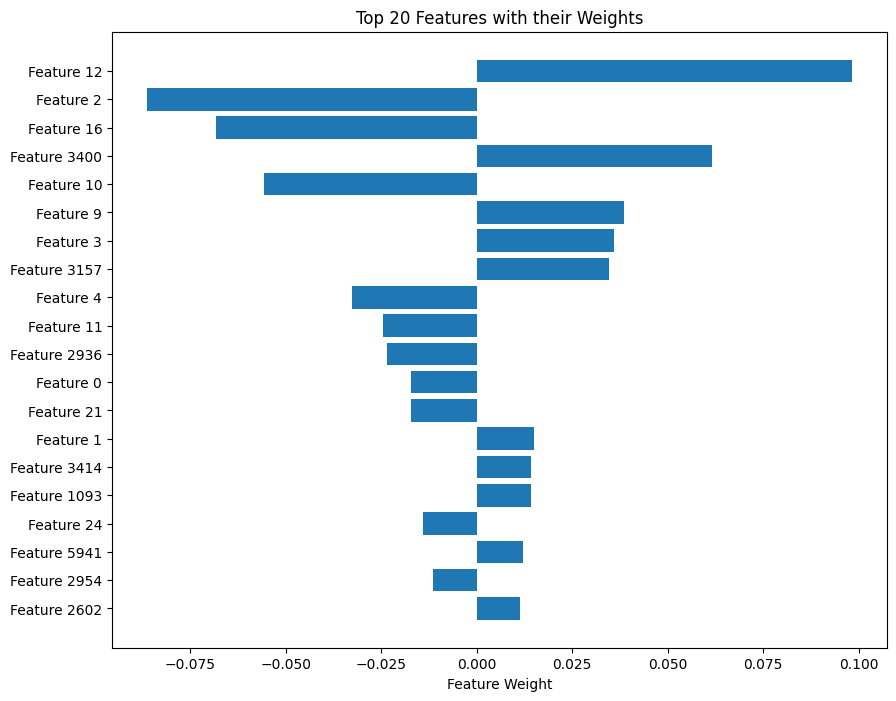

In [53]:
import matplotlib.pyplot as plt
coef = model_2.coef_.ravel()
coef
top_features = np.argsort(np.abs(coef))[-20:]
top_weights = coef[top_features]

plt.figure(figsize=(10, 8))
plt.barh(range(len(top_features)), top_weights, align='center')
plt.yticks(range(len(top_features)), [f'Feature {i}' for i in top_features])
plt.xlabel('Feature Weight')
plt.title('Top 20 Features with their Weights')
plt.show()

# 3 done

In [ ]:
model_3 = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
model_3.fit(X_train, y_train)

In [ ]:
predicted3 = model_3.predict(X_test)
np.mean(predicted3 == y_test)

In [ ]:
confusion_matrix_3 = confusion_matrix(y_test, predicted3)
confusion_matrix_3

In [ ]:
get_param(confusion_matrix_3)

# 4 done

In [ ]:
model_4 = RandomForestClassifier()
model_4.fit(X_train, y_train)

In [ ]:
predicted4 = model_4.predict(X_test)
np.mean(predicted4 == y_test)

In [ ]:
confusion_matrix_4 = confusion_matrix(y_test, predicted4)
confusion_matrix_4

In [ ]:
get_param(confusion_matrix_4)

# 5 done

In [ ]:
model_5 = tree.DecisionTreeClassifier()
model_5.fit(X_train, y_train) 

In [ ]:
predicted5 = model_5.predict(X_test)
np.mean(predicted5 == y_test)

In [ ]:
confusion_matrix_5 = confusion_matrix(y_test, predicted5)
confusion_matrix_5

In [ ]:
get_param(confusion_matrix_5)

# 6

In [ ]:
model_6 = KNeighborsClassifier()
model_6.fit(X_train, y_train)


In [ ]:
predicted6 = model_6.predict(X_test)
np.mean(predicted6 == y_test)

In [ ]:
confusion_matrix_6 = confusion_matrix(y_test, predicted6)
confusion_matrix_6

In [ ]:
get_param(confusion_matrix_6)

## Saving model

In [ ]:
INPUT_FOLDER_2 = '/Users/bober/Desktop/study/naukma/prog/models'

In [ ]:
name = 'random_forest'
version = 'v1'
name_model = f'6__{name}__{version}'
model = model_4

with open(f'{INPUT_FOLDER_2}/{name_model}.pkl','wb') as handle:
    pickle.dump(model, handle)

## Calculating a confusion matrix

In [ ]:
confusion_matrix(y_true, y_pred)